In [1]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import uncertainties
import urllib2
%matplotlib inline
%load_ext ipycache

/home/fabian/anaconda2/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/fabian/anaconda2/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [60]:
%%cache outgrowth.pkl outgrowth
outgrowth_file = urllib2.urlopen('https://raw.githubusercontent.com/fabianrost84/Rost-Rodrigo-Albors-et-al-2016/v0.1-alpha/data/outgrowth.csv')
outgrowth = pd.read_csv(outgrowth_file)
outgrowth['length'] = outgrowth['length'] / 1000.0

[Saved variables 'outgrowth' to file '/media/500G/fabian/work/axolotl/git/axolotl-calculations-phd/outgrowth.pkl'.]


In [61]:
mean_outgrowth = outgrowth.groupby('time').agg(['mean', 'sem'])
mean_outgrowth

length          
          mean       sem
time                    
0.0   0.000000  0.000000
2.0   0.056500  0.009006
3.0   0.163286  0.020837
4.0   0.451750  0.041292
6.0   1.278500  0.056770
8.0   2.257250  0.072343

<Container object of 3 artists>

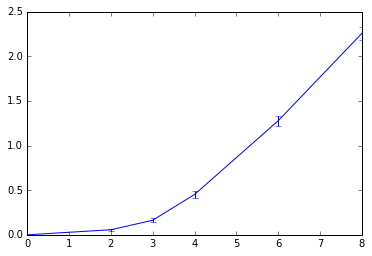

In [8]:
plt.errorbar(mean_outgrowth.index, mean_outgrowth['length', 'mean'], mean_outgrowth['length', 'sem'])

Mean outgrowth velocity:

In [49]:
t = 8.0
L = uncertainties.ufloat(mean_outgrowth.loc[t, ('length', 'mean')], mean_outgrowth.loc[t, ('length', 'sem')])
v = L / t
print 'v: {0:.2f} mm / day'.format(v)
print 'v: {0:.2f} μm / day'.format(v * 1000.0)
print u'v: {0:.1f} μm / h'.format(v * 1000.0 / 24.0)

v: 0.28+/-0.01 mm / day
v: 282.16+/-9.04 μm / day
v: 11.8+/-0.4 μm / h


Zebrafish growth (data from Kimmel et al., 1995, Table 2):

In [12]:
pd.DataFrame?

In [29]:
outgrowth_zebrafish = pd.Series(data = [0.9, 1.4, 1.6], index = pd.Index([16. / 24., 19. / 24., 22. / 24.], name = 'time'), name = 'length')

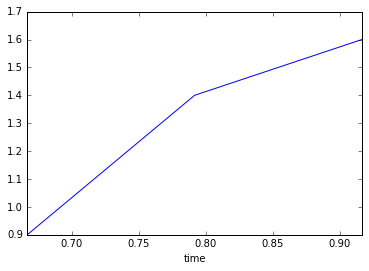

In [30]:
outgrowth_zebrafish.plot()

Mean growth speed zebrafish:

In [48]:
tz = outgrowth_zebrafish.index[-1] - outgrowth_zebrafish.index[0]
Lz = outgrowth_zebrafish.iloc[-1] - outgrowth_zebrafish.iloc[0]
vz = Lz / tz
print 'delta time {} h'.format(tz * 24)
print 'v: {0:.2f} mm / day'.format(vz)
print u'v: {0:.1f} μm / h'.format(vz * 1000.0 / 24.0)

delta time 6.0 h
v: 2.80 mm / day
v: 116.7 μm / h


Growth speed of human hair (Loussouarn et al, 2005):

In [59]:
vh_af = 280.0 / 1000.0 # mm / d
vh_af_sd = 50 / 1000.0 # mm / d
Nh_af = 216
vh_af_sem = vh_af_sd / sp.sqrt(Nh_af)
vh_af = uncertainties.ufloat(vh_af, vh_af_sem)
print 'v_af: {0:.3f} mm / day'.format(vh_af)
print u'v_af: {0:.1f} μm / h'.format(vh_af * 1000.0 / 24.0)

vh_as = 411.0 / 1000.0 # mm / d
vh_as_sd = 43 / 1000.0 # mm / d
Nh_as = 188
vh_as_sem = vh_as_sd / sp.sqrt(Nh_as)
vh_as = uncertainties.ufloat(vh_as, vh_as_sem)
print 'v_as: {0:.3f} mm / day'.format(vh_as)
print u'v_as: {0:.1f} μm / h'.format(vh_as * 1000.0 / 24.0)


v_af: 0.280+/-0.003 mm / day
v_af: 11.7+/-0.1 μm / h
v_as: 0.411+/-0.003 mm / day
v_as: 17.1+/-0.1 μm / h
